# Preprocesamiento de datos de series temporales


**Alan Said Martinez Guzmán A01746210**


Analiza tendencia, estacionalidad, homocedasticidad, presentando resultados visuales y conclusiones basadas en pruebas estadísticas. Interpreta los resultados de las pruebas.
Propone un modelo, indicando el orden de ARIMA(p,d,q), sin construir el modelo.

### Entregable: Preprocesamiento y análisis de datos multivariados o series temporales.

### 1: Identifica correctamente si el problema a tratar requiere un modelo estocástico o determinista

### 2: Selecciona el modelo adecuado al problema

### 3: Explica claramente las ventajas y desventajas del modelo seleccionado para este problema

In [ ]:
#Se importan las librerias necesarias para el procesamiento de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

#Imports necesario
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
from scipy import stats

In [ ]:
"""
En este caso usaré un dataset de series temporales.
Este registró el promedio de manchas solares detectadas por mes en el sol.
"""

df = pd.read_csv("Sunspots.csv")
df.head(10)

,Date,total sunspot number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
5,1749-06-30,139.2
6,1749-07-31,158.0
7,1749-08-31,110.5
8,1749-09-30,126.5
9,1749-10-31,125.8


<ipython-input-37-f34cc9d13b81>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


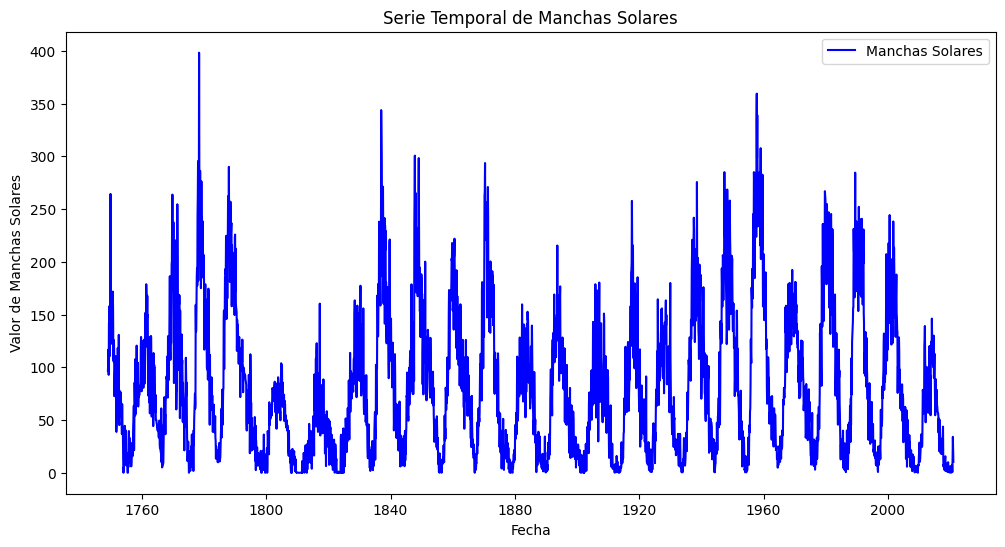

In [ ]:
"""
Visualizaciones.
Antes de tomar alguna decisión para reemplazar datos faltantes es necesario
visualizar nuestro tipo de distribución.
"""

df['Date'] = pd.to_datetime(df['Date'])
#Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crea el gráfico de línea de la serie temporal
plt.plot(df['Date'], df['total sunspot number'], label='Manchas Solares', color='blue')

# Personaliza el gráfico con etiquetas y títulos
plt.title('Serie Temporal de Manchas Solares')
plt.xlabel('Fecha')
plt.ylabel('Valor de Manchas Solares')
plt.legend()

# Muestra el gráfico
plt.show()

In [ ]:
"""
Como siguiente paso sustituiremos los datos faltantes.

Al observar que tenemos muchos datos que se repiten por estación, es decir por
mes, la mejor forma es el sustituirlos por el valor que más se repite, la moda.
"""

df.replace(0, np.nan, inplace=True)

moda = df['total sunspot number'].mode().iloc[0]

df['total sunspot number'].fillna(moda, inplace=True)

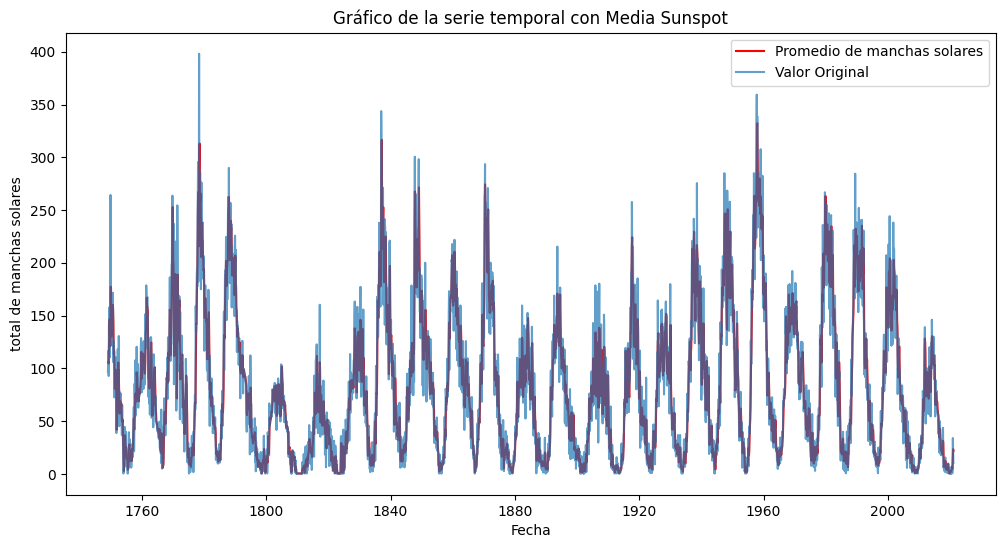

In [ ]:
"""
Analizar tendencia:

Para poder analizar mejor nuestra tendencia de nuestra serie temporal,
creamos una nueva columna [MediaSunspots] donde sacamos la media de [total sunspot number].
Basicamente suavizamos los datos de la gráfica.

En esta gráfica podemos detectar una tendencia estacional, pareciera que son en
intervalos regulares. Para corroborar esto haremos una prueba de Fuller.
"""

df['MediaSunspots'] = df['total sunspot number'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['MediaSunspots'], label='Promedio de manchas solares', color='red')
plt.plot(df['Date'], df['total sunspot number'], label='Valor Original', alpha=0.7)
plt.title('Gráfico de la serie temporal con Media Sunspot')
plt.xlabel('Fecha')
plt.ylabel('total de manchas solares')
plt.legend()
plt.show()

In [ ]:
"""
Estacionariedad:

Para este paso se hizo el uso de la prueba de Dickey-Fuller Aumentada (DFA)

Dados los resultados, al observar que el p-value es considerablemente un valor reducido,
determinamos que los datos son estacionarios.
"""
adf_result = adfuller(df['total sunspot number'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])



ADF Statistic: -10.497721603300178
p-value: 1.1043652429569475e-18


In [ ]:
"""
Corroborar estacionariedad con KPSS:

Para ver si obtenemos de la misma forma con Fuller que la serie es estacionaria.
"""

serie_temporal = df["total sunspot number"]

# Realiza la prueba KPSS
kpss_test = kpss(serie_temporal)

# Extrae los resultados de la prueba
kpss_statistic = kpss_test[0]
p_value = kpss_test[1]
critical_values = kpss_test[3]

# Imprime los resultados
print("Estadística de prueba KPSS:", kpss_statistic)
print("Valor p:", p_value)
print("Valores críticos:", critical_values)


Estadística de prueba KPSS: 0.10366164513954716
Valor p: 0.1
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-41-86f6fdbe0334>:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(serie_temporal)


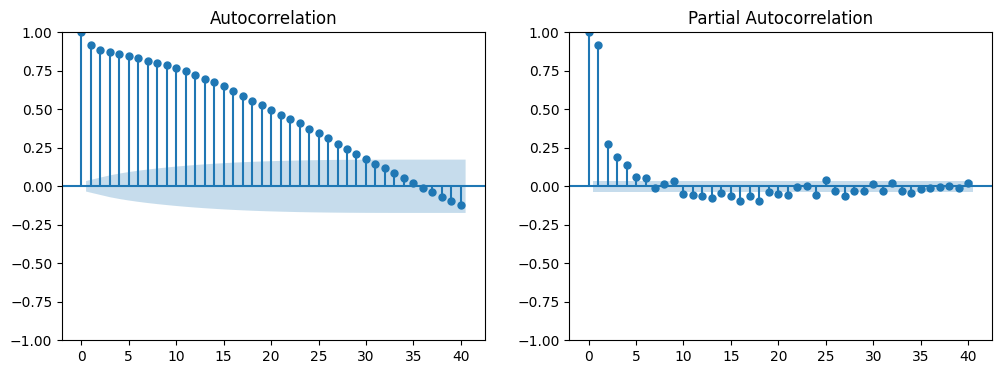

In [ ]:
"""
Análisis de Autocorrelacion y autocorrelación parcial:

A partir de esto podemos identificar los valores de p,d y w

Propuesta modelo ARIMA(3,0,0)

modelo ARIMA(p, d, q) en el que:
"p" representa el orden de la componente autorregresiva
"d" representa el orden de diferenciación
"q" representa el orden de la componente de media móvil.

"""

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['total sunspot number'], lags=40, ax=ax1)
plot_pacf(df['total sunspot number'], lags=40, ax=ax2)
plt.show()

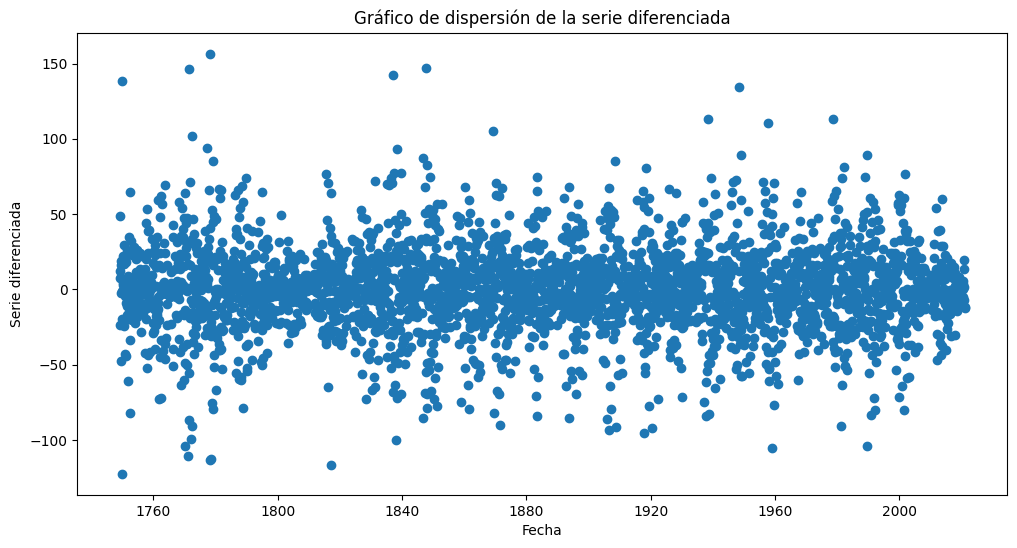

In [ ]:
"""
Homocedasticidad:

Visualización de la homocedasticidad con grafico de dispersión.
"""

# Calcula la serie diferenciada (ejemplo de diferencia entre observaciones)
serie_dif = df['total sunspot number'].diff().dropna()

plt.figure(figsize=(12, 6))
plt.scatter(df['Date'][1:], serie_dif)
plt.title('Gráfico de dispersión de la serie diferenciada')
plt.xlabel('Fecha')
plt.ylabel('Serie diferenciada')
plt.show()



In [ ]:
df['Diferencia_1'] = df['total sunspot number'].diff()
df = df.dropna()

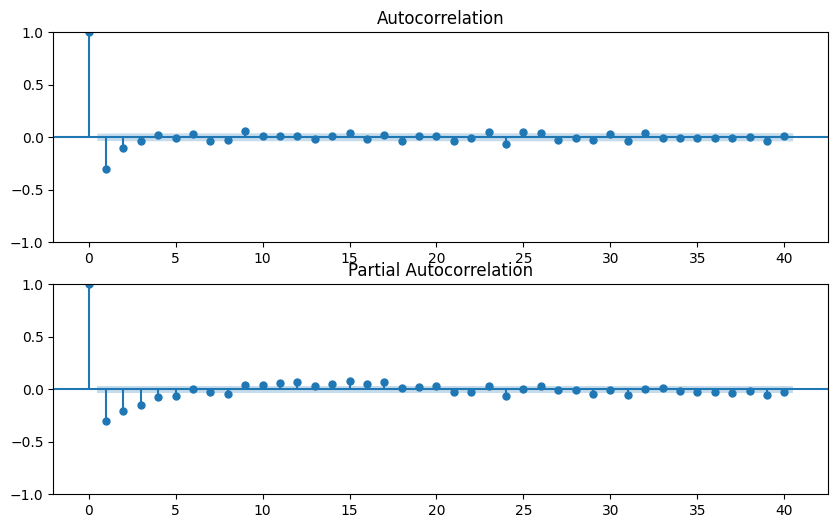

In [ ]:
"""
Calcula y visualiza ACF y PACF de serie diferenciada

Podemos notar que al parecer no hay una estructura de autocorrelacion notable,
esto puede ser debido a varias cosas pero parece que fue por el exceso de
diferenciacion en la serie temporal. Por lo que asumimos que ya es considerada
como estacionaria sin necesidad de diferenciarla. Por lo que la dejaremos sin diferenciar nuevamente.
"""
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

plot_acf(df["Diferencia_1"], ax=ax1, lags=40)  # ACF
plot_pacf(df["Diferencia_1"], ax=ax2, lags=40)  # PACF

plt.show()

## **Hipotesis nula:**
La serie temporal no es estacionaria.

## **Resultados:**
Rechazamos la hipotesis nula al observar que al hacer la prueba de estacionalidad con Fuller, nuestro p-value arrojó un valor de 1.1. Por lo tanto demostramos que nuestra serie temporal es estacionaria en torno a una tendecia deterministica. Para este tipo de casos podemos considerar modelos deterministas como alguna regresión lineal.

## **Propuesta:**
Un modelo estocástico con series temporales

Modelo ARIMA(3,0,0)

## Ventajas:
- Una de las ventajas de los modelos deterministas es que tienen una interpretación clara de las relaciones entre las variables predictoras y la variable de respuesta.

- Facilidad de explicación, este tipo de modelos suelen ser más sencillos de entender, ya que no conlleva mucho tecnicismo de fondo.

## Desventajas:

- No captura variabilidad no explicada, es decir que no es capaz de capturar componentes estocásticos o aleatorios en los datos.

- No es adecuado para predicciones a largo plazo, ya que no pueden capturar los patrones temporales a largo plazo y las estacionalidades.

# Creación del modelo ARIMA


 las predicciones de series temporales se utilizan para tomar decisiones informadas en diversas áreas, como la planificación de la producción, la gestión de inventarios, la optimización de recursos, la planificación financiera, entre otros. En este caso solo es mera curiosidad la que queremos saber, que es la cantidad de manchas solares que el sol tiene.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     total sunspot number   No. Observations:                 3263
Model:                   ARIMA(3, 0, 1)   Log Likelihood              -15143.347
Date:                  Thu, 23 Nov 2023   AIC                          30298.694
Time:                          03:39:37   BIC                          30335.236
Sample:                               0   HQIC                         30311.782
                                 - 3263                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.7744     15.423      5.302      0.000      51.546     112.003
ar.L1          1.1392      0.040     28.775      0.000       1.062       1.217
ar.L2         -0.2168      0.028    

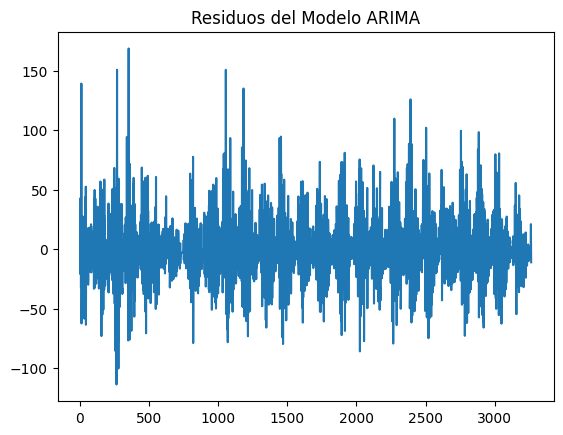

-------------------------------------------------------------------------->
P-value de la prueba de Ljung-Box: lb_pvalue
-------------------------------------------------------------------------->
Predicciones:
3263    16.772732
3264    19.495785
3265    20.513860
3266    21.476323
3267    22.519993
3268    23.563120
3269    24.584599
3270    25.586538
3271    26.570877
3272    27.538066
3273    28.488326
3274    29.421935
3275    30.339184
3276    31.240362
3277    32.125751
3278    32.995628
3279    33.850264
3280    34.689926
3281    35.514876
3282    36.325373
3283    37.121670
3284    37.904015
3285    38.672652
3286    39.427823
3287    40.169762
3288    40.898703
3289    41.614871
3290    42.318492
3291    43.009786
3292    43.688967
3293    44.356248
3294    45.011838
3295    45.655942
3296    46.288761
3297    46.910493
3298    47.521331
3299    48.121467
3300    48.711088
3301    49.290378
3302    49.859520
3303    50.418689
3304    50.968061
3305    51.507808
3306    52.0380

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


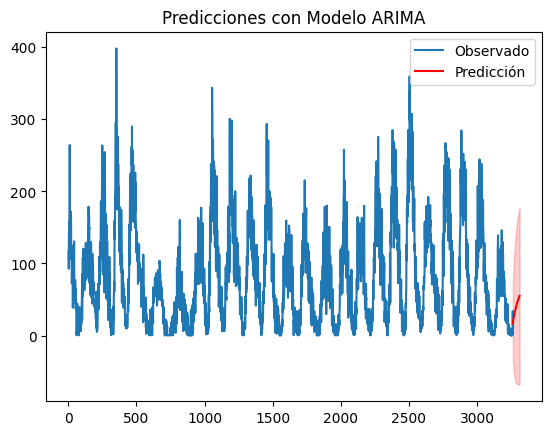

-------------------------------------------------------------------------->


In [ ]:
import pandas as pd
import statsmodels.api as sm

p = 3  # Orden autorregresivo
d = 0  # Orden de diferenciación
q = 1  # Orden de media móvil

# Crea y ajusta el modelo ARIMA
model = sm.tsa.ARIMA(df['total sunspot number'], order=(p, d, q))
result = model.fit()

# Imprime un resumen del modelo ajustado
print(result.summary())
print("-------------------------------------------------------------------------->")
# Paso 3: Diagnóstico del modelo ARIMA
# Examinemos los residuos del modelo para asegurarnos de que no haya estructura de dependencia.

# Gráfico de residuos
residuals = result.resid
residuals.plot(title='Residuos del Modelo ARIMA')
plt.show()

print("-------------------------------------------------------------------------->")

# Prueba de Ljung-Box para evaluar la autocorrelación de los residuos
lb_test_stat, lb_p_value = sm.stats.acorr_ljungbox(residuals, lags=[10])
print("P-value de la prueba de Ljung-Box:", lb_p_value)

print("-------------------------------------------------------------------------->")

# Paso 4: Predicciones con el modelo ARIMA
# Realizaremos predicciones para los próximos 10 pasos en el tiempo como ejemplo.

n_pred_steps = 50
forecast = result.get_forecast(steps=n_pred_steps)

# Extraer predicciones, errores estándar y intervalos de confianza
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Imprime las predicciones
print("Predicciones:")
print(forecast_values)

print("-------------------------------------------------------------------------->")

# Imprime los intervalos de confianza
print("Intervalos de Confianza:")
print(conf_int)

print("-------------------------------------------------------------------------->")

# Gráfico de las predicciones
plt.plot(df['total sunspot number'], label='Observado')
plt.plot(range(len(df), len(df) + n_pred_steps), forecast_values, label='Predicción', color='red')
plt.fill_between(range(len(df), len(df) + n_pred_steps), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2)
plt.title('Predicciones con Modelo ARIMA')
plt.legend()
plt.show()

print("-------------------------------------------------------------------------->")



# Interpretación de los resultados:

Los coeficientes estimados para los terminos constantes, el de autoregresión y media movil son significativos (valores p pequeños), lo que sugiere que los terminos son importantes para el modelo.

Dentro de la pruebas hecha (Ljung-box), sabemos que esta fue hecha para evaluar si hay autocorrelacion significativa en los residuos del modelo, por lo que al observar los datos arrojados vemos que son significativamente altos, significando un comportamiento de ruido blanco, el cual es benefico para el modelo.

Dentro de la prueba de heterocedasticidad podemos observar que esta no muestra evidencia significativa de heterocedasticidad en los resultados.

La asimetría es 0.65 y la kurtosis es 6.41, pero estos valores no son extremadamente altos y podrían considerarse aceptables.



# Creación de modelo SARIMA


In [ ]:
#Importamos las librerias necesarias para el modelo SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df.set_index('Date', inplace=True)
df.index.freq = 'M'

In [ ]:
p, d, q = 3, 1, 3
P, D, Q, s = 1, 1, 1, 12 #(componentes autoregresivos, estacional, moving average, periodos)

model = SARIMAX(df["total sunspot number"], order = (p, d, q), seasonal_order=(P, D, Q, s))
result = model.fit(max_iter=200, tol=1e-6)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: tol, max_iter. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                 total sunspot number   No. Observations:                 3263
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood              -15088.119
Date:                              Thu, 23 Nov 2023   AIC                          30194.239
Time:                                      20:35:39   BIC                          30249.016
Sample:                                  03-31-1749   HQIC                         30213.862
                                       - 01-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3269      0.023     14.171      0.000       0.282       0.372
ar.L2          0.94

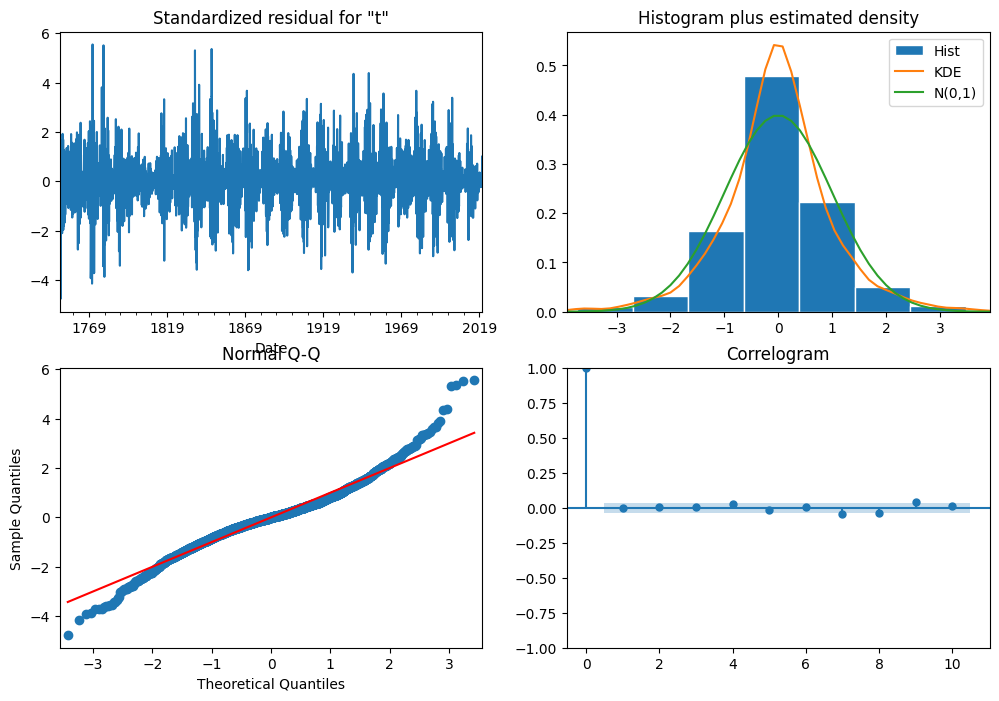

In [ ]:
"""
Como podemos observar en los residuos estos oscilan en 0 por lo que es una buena señal.
"""

# Resumen del modelo
print(result.summary())

# Gráfico de diagnóstico
result.plot_diagnostics(figsize=(12, 8))
plt.show()

In [ ]:
"""
Número de pasos de predicción, esto quiere decir que veremos una prediccion
de un año completo.
"""
n_pred_steps = 12

# Predicciones
fecha_prediccion = pd.date_range(start=df.index[-1], periods=n_pred_steps + 1, freq='M')[1:]


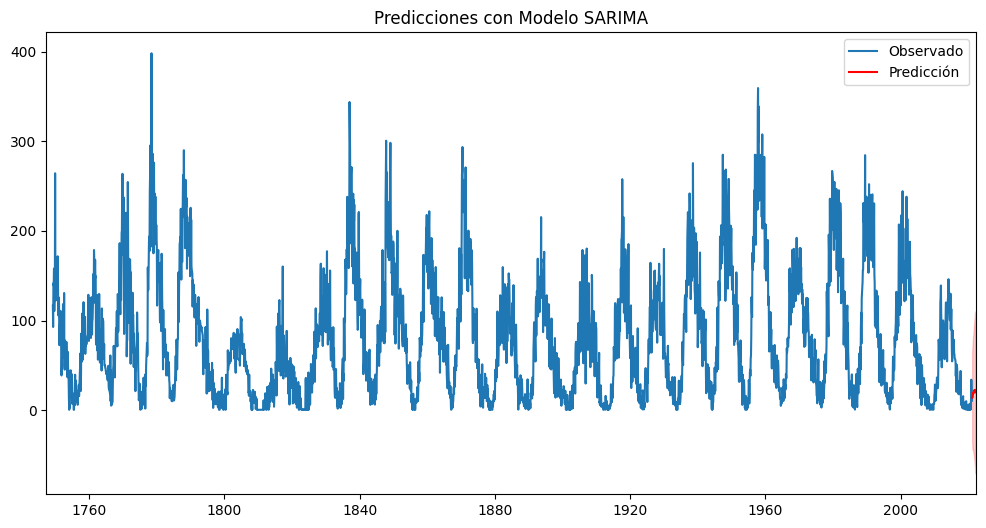

In [ ]:
"""
Al ser una serie temporal muy grande, la prediccion es casi indetectable de ver
por lo que añadimos una vista un poco más recortada viendo que la prediccion es bastante
lineal.
"""
plt.figure(figsize=(12, 6))
plt.plot(df['total sunspot number'], label='Observado')
plt.plot(fecha_prediccion, forecast.predicted_mean, label='Predicción', color='red')
plt.fill_between(fecha_prediccion, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='red', alpha=0.2)
plt.title('Predicciones con Modelo SARIMA')
plt.legend()
plt.xlim(df.index[0] - pd.DateOffset(years=2), fecha_prediccion[-1] + pd.DateOffset(months=3))
#plt.xlim(fecha_prediccion[0] - pd.DateOffset(years=2), fecha_prediccion[-1] + pd.DateOffset(months=200))
plt.show()



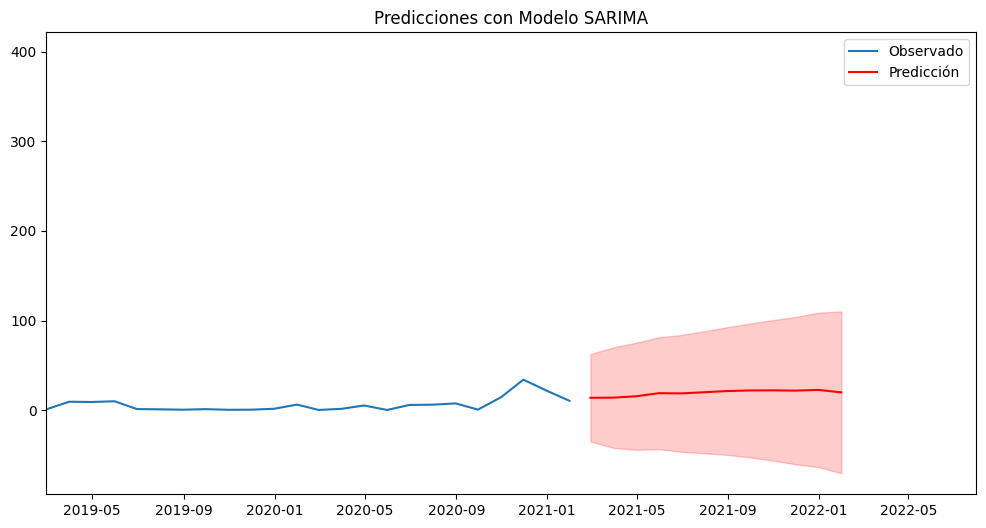

In [ ]:
"""
Graficación de una predicción más visible.
"""
plt.figure(figsize=(12, 6))
plt.plot(df['total sunspot number'], label='Observado')
plt.plot(fecha_prediccion, forecast.predicted_mean, label='Predicción', color='red')
plt.fill_between(fecha_prediccion, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='red', alpha=0.2)
plt.title('Predicciones con Modelo SARIMA')
plt.legend()
plt.xlim(fecha_prediccion[0] - pd.DateOffset(years=2), fecha_prediccion[-1] + pd.DateOffset(months=6))
plt.show()

# Conclusiones finales:

Al poder observar residuos significativamente grandes, optamos por la creación
del modelo SARIMA, agregando la variable s del componente estacional, al realizar este modelo y jugar un poco con los valores de p,d y q noté que los residuos fueron significantemente menores a comparacion del modelo base ARIMA, estos oscilando en 0. Por lo que podemos inferir que están capturando la tendencia general de los datos.